# Reference
https://pyimagesearch.com/2016/10/10/gradient-descent-with-python/

https://pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

import numpy as np

In [49]:
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def predict(X: np.ndarray, W: np.ndarray):
    preds = sigmoid_activation(X.dot(W))
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1
    
    return preds

In [50]:
sample = np.array([1,2,3,4,5])
np.c_[sample, np.ones(len(sample))]

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.]])

In [51]:
X, y = make_blobs(n_samples=1000, n_features=2,  centers=2)
y = y.reshape(len(y), 1)
X = np.c_[X, np.ones(len(X))] # bias trick

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5, random_state=42)

In [52]:
W = np.random.randn(X.shape[1], 1)
losses = []
epochs = 200
alpha = 0.001

for epoch in range(0, epochs):
    preds = sigmoid_activation(X_train.dot(W))
    error = preds - y_train
    loss = np.sum(error ** 2)
    losses.append(loss)
    
    d = error * sigmoid_deriv(preds)
    gradient = X_train.T.dot(d)
    W += -alpha * gradient
    
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
        loss))

[INFO] epoch=1, loss=261.0791177
[INFO] epoch=5, loss=132.5601353
[INFO] epoch=10, loss=56.4420727
[INFO] epoch=15, loss=38.0787579
[INFO] epoch=20, loss=30.6112301
[INFO] epoch=25, loss=26.5009596
[INFO] epoch=30, loss=23.8616584
[INFO] epoch=35, loss=22.0037572
[INFO] epoch=40, loss=20.6139305
[INFO] epoch=45, loss=19.5284454
[INFO] epoch=50, loss=18.6529736
[INFO] epoch=55, loss=17.9291143
[INFO] epoch=60, loss=17.3186514
[INFO] epoch=65, loss=16.7954550
[INFO] epoch=70, loss=16.3410096
[INFO] epoch=75, loss=15.9418013
[INFO] epoch=80, loss=15.5877182
[INFO] epoch=85, loss=15.2710310
[INFO] epoch=90, loss=14.9857222
[INFO] epoch=95, loss=14.7270314
[INFO] epoch=100, loss=14.4911387
[INFO] epoch=105, loss=14.2749410
[INFO] epoch=110, loss=14.0758884
[INFO] epoch=115, loss=13.8918653
[INFO] epoch=120, loss=13.7210995
[INFO] epoch=125, loss=13.5620950
[INFO] epoch=130, loss=13.4135791
[INFO] epoch=135, loss=13.2744615
[INFO] epoch=140, loss=13.1438025
[INFO] epoch=145, loss=13.0207873


In [53]:
preds = predict(X_valid, W)
classification_report(y_valid, preds)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       257\n           1       0.98      0.98      0.98       243\n\n    accuracy                           0.98       500\n   macro avg       0.98      0.98      0.98       500\nweighted avg       0.98      0.98      0.98       500\n'

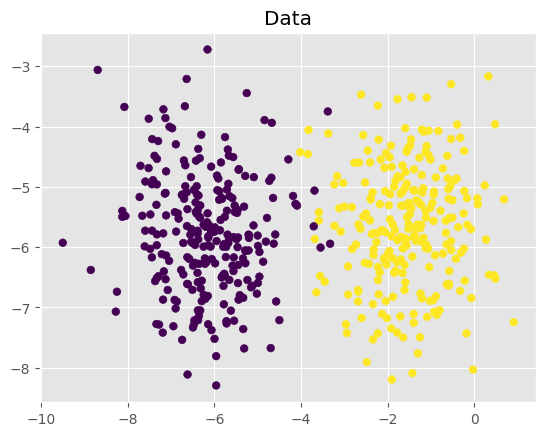

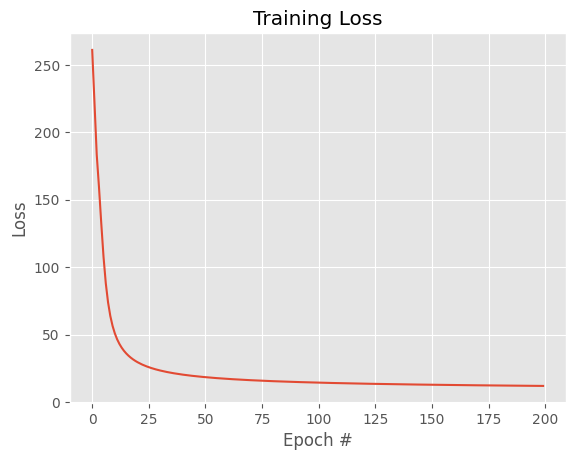

In [54]:
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(X_valid[:, 0], X_valid[:, 1], marker="o", c=y_valid[:, 0], s=30)
# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

SGD (mini-batch)

In [55]:

def next_batch(X: np.ndarray, y: np.ndarray, batchSize: int):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i: i + batchSize], y[i: i + batchSize])

In [56]:
W = np.random.randn(X.shape[1], 1)
losses = []
batch_size = 50

for epoch in np.arange(0, epochs):
    epoch_loss = []
    
    for batch_X, batch_y in next_batch(X_train, y_train, batch_size):
        preds = sigmoid_activation(batch_X.dot(W))
        
        error = preds - batch_y
        epoch_loss.append(np.sum(error ** 2))
        
        d = error * sigmoid_deriv(preds)
        gradient = batch_X.T.dot(d)
        
        W += - alpha * gradient
    
    loss = np.average(epoch_loss)
    losses.append(loss)
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1), loss))
        
preds = predict(X_valid, W)
classification_report(y_valid, preds)

[INFO] epoch=1, loss=18.4783861
[INFO] epoch=5, loss=5.5269669
[INFO] epoch=10, loss=1.5144813
[INFO] epoch=15, loss=1.1740417
[INFO] epoch=20, loss=1.1358525
[INFO] epoch=25, loss=1.1294800
[INFO] epoch=30, loss=1.1272191
[INFO] epoch=35, loss=1.1255488
[INFO] epoch=40, loss=1.1239767
[INFO] epoch=45, loss=1.1224315
[INFO] epoch=50, loss=1.1209026
[INFO] epoch=55, loss=1.1193883
[INFO] epoch=60, loss=1.1178883
[INFO] epoch=65, loss=1.1164022
[INFO] epoch=70, loss=1.1149299
[INFO] epoch=75, loss=1.1134712
[INFO] epoch=80, loss=1.1120257
[INFO] epoch=85, loss=1.1105933
[INFO] epoch=90, loss=1.1091738
[INFO] epoch=95, loss=1.1077669
[INFO] epoch=100, loss=1.1063724
[INFO] epoch=105, loss=1.1049902
[INFO] epoch=110, loss=1.1036201
[INFO] epoch=115, loss=1.1022617
[INFO] epoch=120, loss=1.1009151
[INFO] epoch=125, loss=1.0995799
[INFO] epoch=130, loss=1.0982560
[INFO] epoch=135, loss=1.0969433
[INFO] epoch=140, loss=1.0956415
[INFO] epoch=145, loss=1.0943505
[INFO] epoch=150, loss=1.093070

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       257\n           1       0.98      0.98      0.98       243\n\n    accuracy                           0.98       500\n   macro avg       0.98      0.98      0.98       500\nweighted avg       0.98      0.98      0.98       500\n'

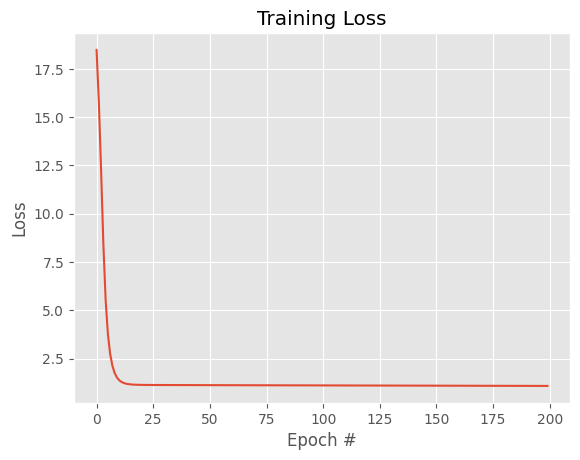

In [57]:
# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()